In [36]:
import laspy
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, box
from pathlib import Path
import contextily as cx          # pip install contextily
from pyproj import CRS
import pprint

def plot_las_file(file_path, every_nth=1000):

    las  = laspy.read(file_path)
    xyz  = las.xyz[::every_nth]          
    x, y, z = xyz.T                      


    crs_las = las.header.parse_crs(prefer_wkt=True)  # prefer WKT VLR (LAS 1.4) over GeoTIFF keys (LAS 1.0-1.3)
    print(crs_las)


    gdf_pts  = gpd.GeoDataFrame({"elev": z}, geometry=gpd.points_from_xy(x, y), crs=crs_las)

    xmin, ymin, _ = las.header.mins
    xmax, ymax, _ = las.header.maxs

    gdf_pts_web  = gdf_pts.to_crs(epsg=3857)
    #gdf_bbox_web = gdf_bbox.to_crs(epsg=3857)

    fig, ax = plt.subplots()


    gdf_pts_web.plot(ax=ax, column="elev", markersize=2, cmap="viridis", alpha=0.6, legend=True, legend_kwds={"label": "Elevation (m)"})

    #gdf_bbox_web.boundary.plot(ax=ax, edgecolor="red", linewidth=2, label="Bounding box")

    cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

    ax.set_axis_off()
    ax.set_title(Path(file_path).name, fontsize=12)
    plt.tight_layout()
    plt.show()


def print_header(path):
    with laspy.open(path) as f:
        hdr = f.header
        print("=== CORE HEADER ===")
        print(hdr)                       # as above

        print("\n=== VLRs ===")
        for i, vlr in enumerate(hdr.vlrs, 1):
            print(f"\n[VLR {i}]  user_id={vlr.user_id}  record_id={vlr.record_id}")
            pprint.pprint(vlr.__dict__, width=120)

        if hdr.evlrs:
            print("\n=== EVLRs ===")
            for i, evlr in enumerate(hdr.evlrs, 1):
                print(f"\n[EVLR {i}] user_id={evlr.user_id} record_id={evlr.record_id}")
                pprint.pprint(evlr.__dict__, width=120)

#plot_las_file(path, every_nth=2_000)   # show 1 point out of 2 000


=== CORE HEADER ===
<LasHeader(1.4, <PointFormat(1, 0 bytes of extra dims)>)>

=== VLRs ===

[VLR 1]  user_id=LASF_Projection  record_id=2112
{'_description': '',
 '_record_id': 2112,
 '_user_id': 'LASF_Projection',
 'string': '\x00\x00\x00\x00\x00\x00GEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble", MEMBER["World '
           'Geodetic System 1984 (Transit)", ID["EPSG",1166]], MEMBER["World Geodetic System 1984 (G730)", '
           'ID["EPSG",1152]], MEMBER["World Geodetic System 1984 (G873)", ID["EPSG",1153]], MEMBER["World Geodetic '
           'System 1984 (G1150)", ID["EPSG",1154]], MEMBER["World Geodetic System 1984 (G1674)", ID["EPSG",1155]], '
           'MEMBER["World Geodetic System 1984 (G1762)", ID["EPSG",1156]], MEMBER["World Geodetic System 1984 '
           '(G2139)", ID["EPSG",1309]], MEMBER["World Geodetic System 1984 (G2296)", ID["EPSG",1383]], ELLIPSOID["WGS '
           '84",6378137,298.257223563,LENGTHUNIT["metre",1,ID["EPSG",9001]],ID["EPSG",7030]]

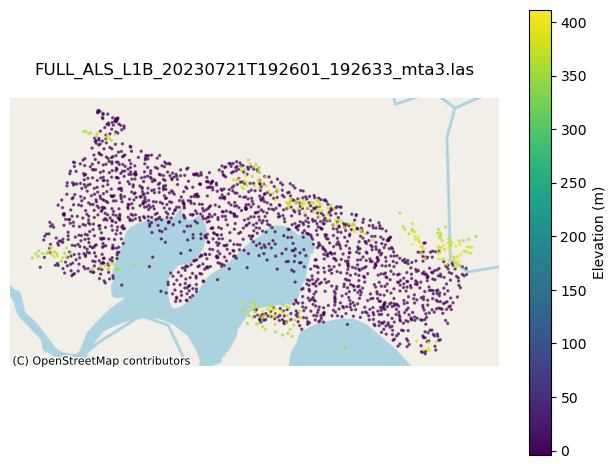

In [39]:
#
path = r'n:\isipd\projects\p_planetdw\data\lidar\test\FULL_ALS_L1B_20240607T113448_113743.las'
preprocessed_path = r'n:\isipd\projects\p_planetdw\data\lidar\02_pointclouds\FULL_ALS_L1B_20230721T192601_192633_mta3.las'

print_header(path)  # print header info
plot_las_file(preprocessed_path, every_nth=2_000) 